In [2]:
#!pip install git+https://github.com/huggingface/transformers

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/huggingface/transformers to c:\users\pc\appdata\local\temp\pip-req-build-g1jduj9s
  Resolved https://github.com/huggingface/transformers to commit ac33aeeeee2a7a89b89c93c2962e6feb90daef0a
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for transformers: filename=transformers-4.40.0.dev0-py3-none-any.whl size=8888599 sha256=0d32a21d1099ddfd14cf7167ad5d989585a95622feecc04d0be8d52e3069ad52
  Stored in directory: C:\Users\PC\AppData\Local\Temp\pip-ephem-wheel-cache-b45aoupy\wheels\04\a3\f1\b88775f8e1665827525b19ac7590250f1038d947067beba9fb
Successfully built transformers


  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers 'C:\Users\PC\AppData\Local\Temp\pip-req-build-g1jduj9s'


In [2]:
#!pip install -U accelerate

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for accelerate from https://files.pythonhosted.org/packages/1b/e8/2fc7af3fa77ddac89a9c9b390d2d31d1db0612247ba2274009946959604e/accelerate-0.29.2-py3-none-any.whl.metadata
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/54/ce/09e508c682c612e7ff7b5cf1249a963d10db58f16d77007177f7770c661b/safetensors-0.4.2-cp311-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/297.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/297.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/297.4 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/297.4 kB 262.6 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/297.4 kB 262.6 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/297.4 kB 262.6 kB/s eta 0:00:02
   ---- --------------------------------

# importing libs

In [2]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import Image

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


# importing models

In [3]:
#loading model SD 1.5

pipeline = StableDiffusionPipeline.from_single_file(
    "E:/code work/aima/app/models/v1-5-pruned-emaonly.safetensors"
)

#pipeline = pipeline.to("cuda")

E:\Conda\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [4]:
#model_path= "E:/code work/aima/app/models/v3.safetensors"
#pipeline.unet.load_attn_procs(model_path)
pipeline.load_lora_weights("E:/code work/aima/app/models/", weight_name="v3.safetensors")
pipeline = pipeline.to("cuda")

C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\diffusers\loaders\lora.py:810: FutureWarning: `_modify_text_encoder` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_modify_text_encoder", "0.25", LORA_DEPRECATION_MESSAGE)
C:\Users\PC\AppData\Roaming\Python\Python311\site-packages\diffusers\loaders\lora.py:781: FutureWarning: `_remove_text_encoder_monkey_patch_classmethod` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_remove_text_encoder_monkey_patch_classmethod", "0.25", LORA_DEPRECATION_MESSAGE)


## example prompts on base model

In [8]:
#example prompt 1

prompt = "a photo of an astronaut riding a horse on mars"
image = pipeline(prompt).images[0]  
    
image.save("C:/Users/PC/OneDrive/Desktop/astronaut_rides_horse.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [14]:
#example prompt 2 (better)
prompt = "a photo of an astronaut riding a horse on mars"
neg_prompt = ''
image = pipeline(prompt,
             negative_prompt=neg_prompt,
             num_inference_steps=50, #50 is better
            height=512,
            width=768,
            guidance_scale=7).images[0]  
image.save("C:/Users/PC/OneDrive/Desktop/astronaut_rides_horse2.png")

  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
#example prompt 3
prompt = "a photo of an astronaut riding a horse on mars"
neg_prompt = ''
image = pipeline(prompt,
             negative_prompt=neg_prompt,
             num_inference_steps=28,
            height=512,
            width=768,
            guidance_scale=7).images[0] 

image.save("C:/Users/PC/OneDrive/Desktop/astronaut_rides_horse3.png")

  0%|          | 0/28 [00:00<?, ?it/s]

In [16]:
# use case example prompt 1
prompt = " a character turnaround, GameArt , a man , white and slight red overcoat , wearing hood , sword on hip , brown logo belt , bearded , black leather boots , silver gaunlets , 3 poses ,back pose , side pose, front pose"
neg_prompt = 'ugly, boring, bad anatomy, blurry, pixelated, obscure, unnatural colors, poor lighting, dullness, and unclear , ugly face , disfigured'
image = pipeline(prompt,
             negative_prompt=neg_prompt,
             num_inference_steps=50,
            height=512,
            width=768,
            guidance_scale=7).images[0]  

image.save("C:/Users/PC/OneDrive/Desktop/ex1.png")

  0%|          | 0/50 [00:00<?, ?it/s]

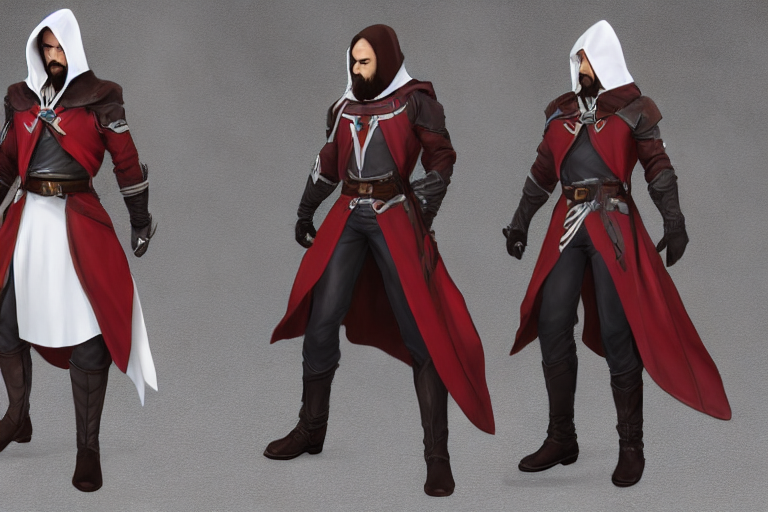

In [17]:
# Specify the file path of the image
image_path = r'C:\Users\PC\OneDrive\Desktop\ex1.png'

# Display the image
Image(filename=image_path)

## prompting on our trained model

### NOTE: for some reason when attaching our trained adapter model, the img is much more noiser
### hence more inference steps are needed and as a result, higher inference time
### figuire out how to incoprate schedulers or highres GANS

In [7]:
# use case example prompt 1
#example prompt 3
prompt = "<lora:v3:0.75> , <in_morte>, a character turnaround, GameArt , a man , white and slight red overcoat , wearing hood , sword on hip , brown logo belt , bearded , black leather boots , silver gaunlets , 3 poses ,back pose , side pose, front pose"
neg_prompt = 'nsfw, ugly, boring, bad anatomy, blurry, pixelated, obscure, unnatural colors, poor lighting, dullness, and unclear , ugly face , disfigured'
image = pipeline(prompt,
            negative_prompt=neg_prompt,
            num_inference_steps=70,
            height=512,
            width=768,
            #timesteps= ,
            guidance_scale=7,
            guidance_rescale= 0.7).images[0]  

image.save("C:/Users/PC/OneDrive/Desktop/ex2.png")

  0%|          | 0/70 [00:00<?, ?it/s]

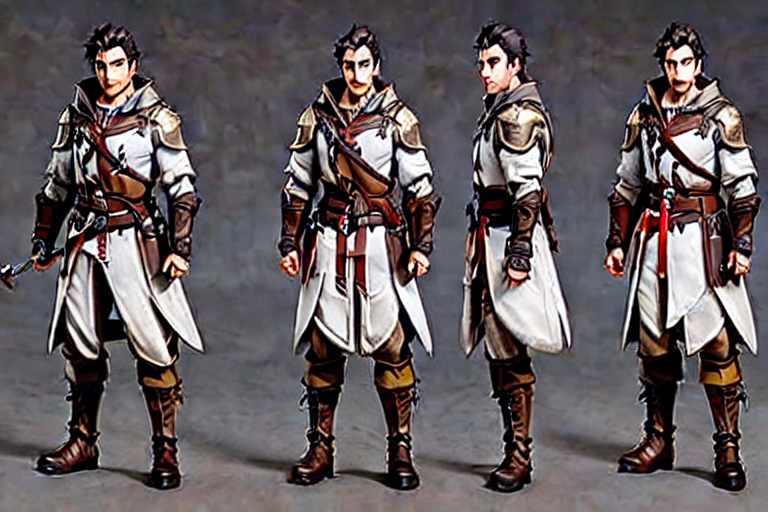

In [3]:
image_path = r'C:\Users\PC\OneDrive\Desktop\ex2.png'

# Display the image
Image(filename=image_path)

# Function implementation

In [11]:
def poseGen(textprompt):
    #model loading (should not load each time) but has no effect on recources, they reset each time (ok for now then)
    pipeline = StableDiffusionPipeline.from_single_file( #base model
    "E:/code work/aima/app/models/v1-5-pruned-emaonly.safetensors"
    )
    pipeline.load_lora_weights("E:/code work/aima/app/models/", weight_name="v3.safetensors") #trained adapter
    pipeline = pipeline.to("cuda")
    
    
    fixedprompt = "<lora:v3:0.8> , <in_morte>, a character turnaround"
    textprompt= fixedprompt + " , " + textprompt
    
    neg_prompt = 'nsfw, ugly, boring, bad anatomy, blurry, pixelated, obscure, unnatural colors, poor lighting, dullness, and unclear , ugly face , disfigured'
    image = pipeline(prompt= textprompt,
            negative_prompt=neg_prompt,
            num_inference_steps=70,
            height=512,
            width=768,
            #timesteps= ,
            guidance_scale=7,
            guidance_rescale= 0.7).images[0] 
    
    
    return image

In [14]:
textprompt= "a man , white and slight red overcoat , wearing hood , sword on hip , brown logo belt , bearded , black leather boots , silver gaunlets , 3 poses ,back pose , side pose, front pose"
image= poseGen(textprompt)

  0%|          | 0/70 [00:00<?, ?it/s]

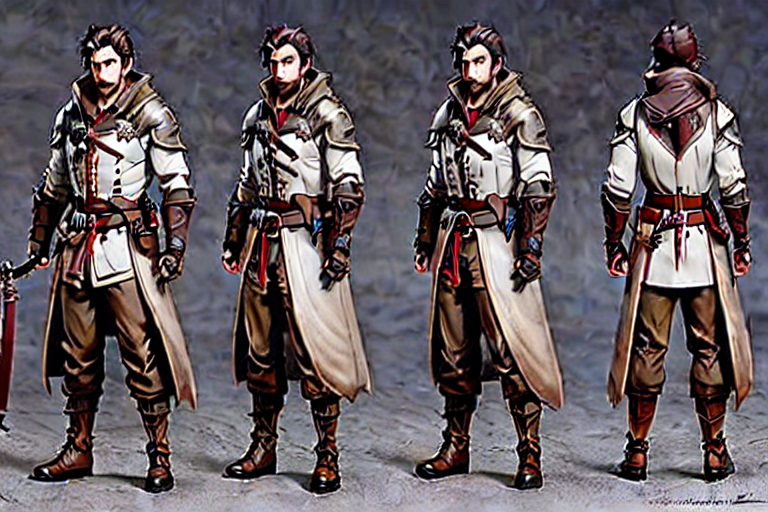

In [15]:
image.save("C:/Users/PC/OneDrive/Desktop/ex2.png")
image_path = r'C:\Users\PC\OneDrive\Desktop\ex2.png'

# Display the image
Image(filename=image_path)